# **Setup**

## **Mounting Google Drive**

In [174]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Images base path setup**

In [175]:
base_path = "/content/gdrive/MyDrive/Elektrotehnički fakultet/Računarska vizija - Vježbe/Laboratorijska vježba 4/images"

## **Importing required modules**

In [176]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

# **Convolution**

In [177]:
def convolve(input, kernel, padding = 0):
  kernel = np.flipud(np.fliplr(kernel))

  kernel_shape_x = kernel.shape[0]
  kernel_shape_y = kernel.shape[1]
  input_shape_x = input.shape[0]
  input_shape_y = input.shape[1]

  strides = 1

  output_shape_x = int(((input_shape_x + 2 * padding - kernel_shape_x) / strides) + 1)
  output_shape_y = int(((input_shape_y + 2 * padding - kernel_shape_y) / strides) + 1)

  output = np.zeros((output_shape_x, output_shape_y))

  input_padded = input
  if padding != 0:
    input_padded = np.zeros((input_shape_x + padding * 2, input_shape_y + padding * 2))
    input_padded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = input

  for row in range(0, input.shape[0]):
    for column in range(0, input.shape[1]):
      point_segment_x_start = int(row + padding - int(kernel_shape_x / 2))
      point_segment_x_end = int(row + padding + int(kernel_shape_x / 2) + 1)
      point_segment_y_start = int(column + padding - int(kernel_shape_y / 2))
      point_segment_y_end = int(column + padding + int(kernel_shape_y / 2) + 1)
      output[row, column] = np.sum(input_padded[point_segment_x_start:point_segment_x_end, point_segment_y_start:point_segment_y_end] * kernel)

  return output

In [178]:
input = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
kernel = np.array([[-1., -2., -1.], [0., 0., 0.], [1., 2., 1.]])

output = convolve(input, kernel, 1)

output

array([[-13., -20., -17.],
       [-18., -24., -18.],
       [ 13.,  20.,  17.]])

# **Gaussian filter**

In [179]:
def create_gaussian_filter(f_size, f_sigma):
  x, y = np.mgrid[(-f_size // 2 + 1):(f_size // 2 + 1), (-f_size // 2 + 1):(f_size // 2 + 1)]
  filter = np.exp(-((x**2 + y**2) / (2.0 * f_sigma**2)))
  return filter / filter.sum()

In [180]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 100

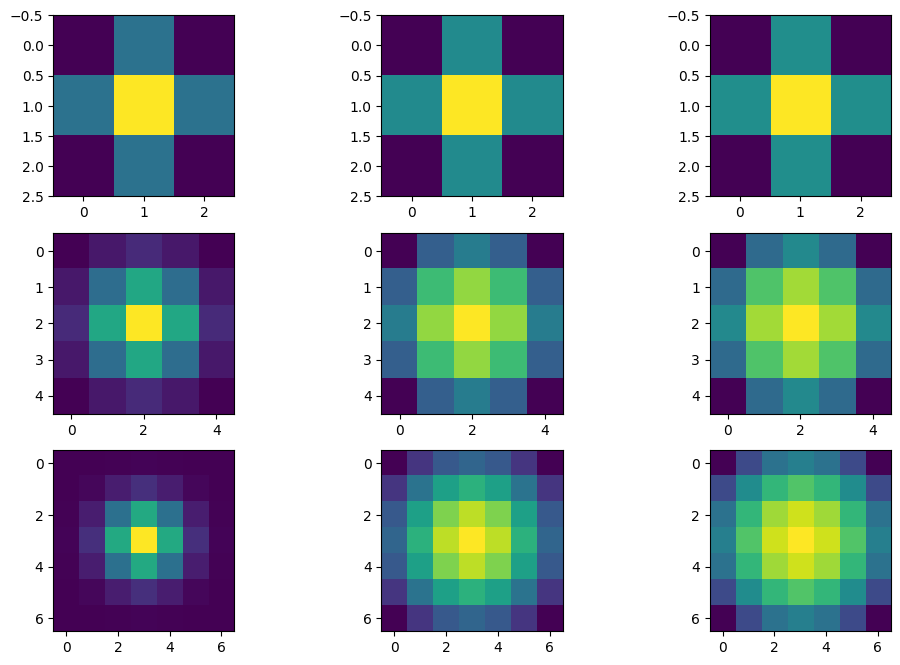

In [181]:
kernel_size = [3, 5, 7]
sigmas = [1, 2.5, 4]

figure, axes = plt.subplots(len(kernel_size), len(sigmas))

for index in [(x, y) for x in range(len(kernel_size)) for y in range(len(sigmas))]:
  axes[index].imshow(create_gaussian_filter(kernel_size[index[0]], sigmas[index[1]]))

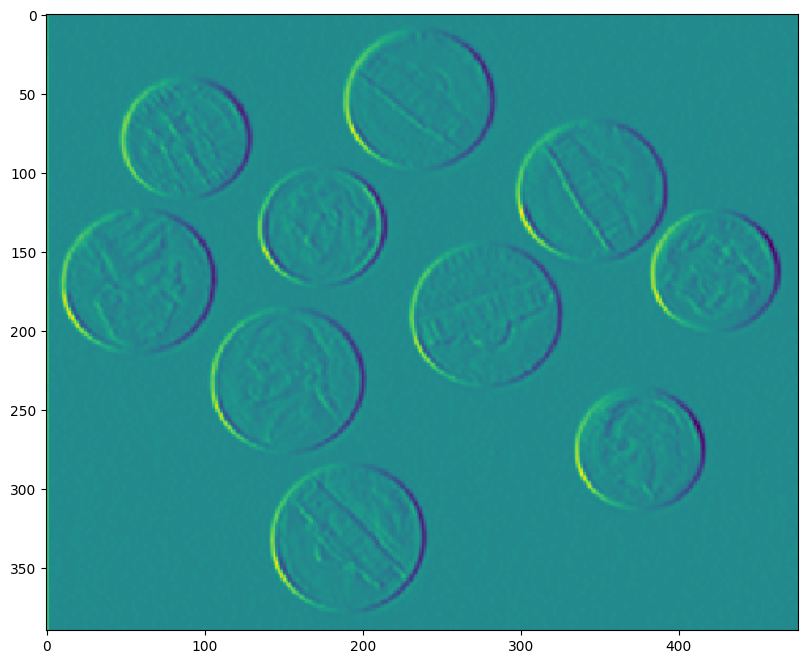

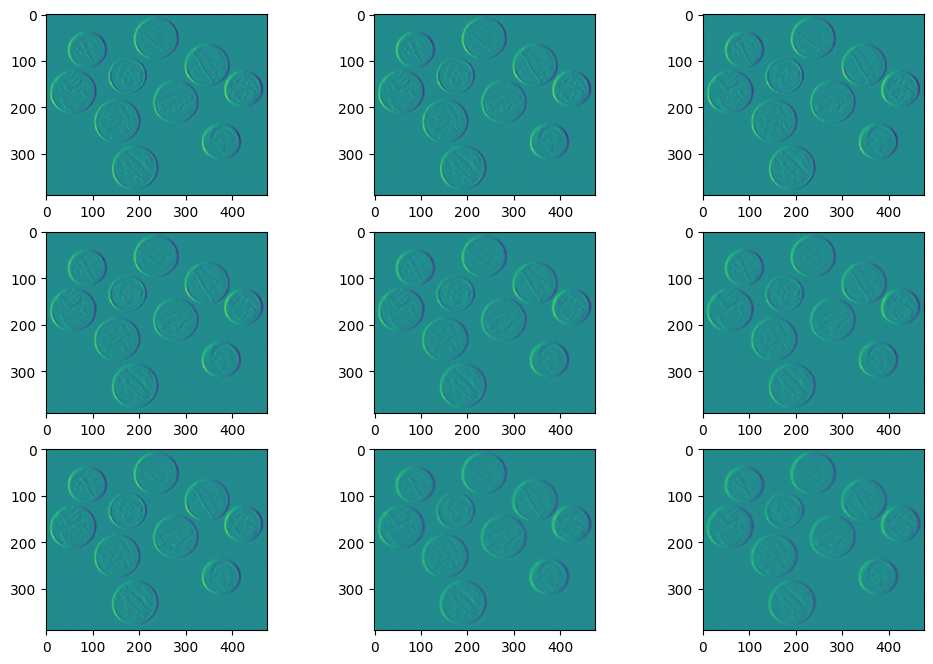

In [182]:
image = cv2.imread(base_path + "/gaussian.png", 0)
plt.imshow(image)

kernel_size = [3, 5, 7]
sigmas = [1, 2.5, 4]

figure, axes = plt.subplots(len(kernel_size), len(sigmas))

for index in [(x, y) for x in range(len(kernel_size)) for y in range(len(sigmas))]:
  axes[index].imshow(cv2.GaussianBlur(image, (kernel_size[index[0]], kernel_size[0]), sigmas[index[1]]), vmin=0, vmax=255)

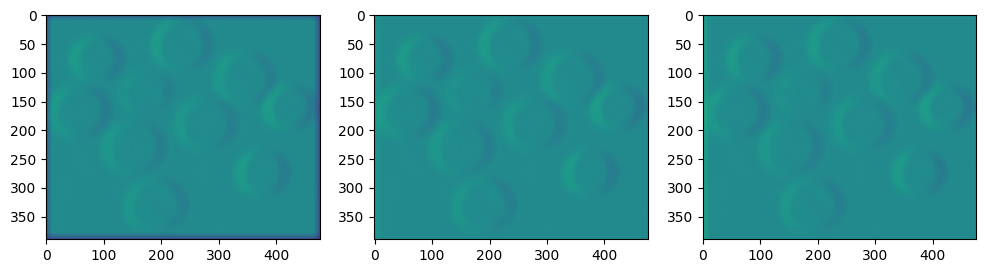

In [183]:
f_size = 25
f_sigma = 10

border_types = np.array([cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, cv2.BORDER_REPLICATE])

figure, axes = plt.subplots(1, len(border_types))

for border_type in enumerate(border_types):
  axes[border_type[0]].imshow(cv2.GaussianBlur(image, (f_size, f_size), 10, borderType = border_type[1]), vmin=0, vmax=255)

# **Mean filter**

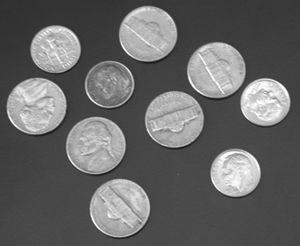

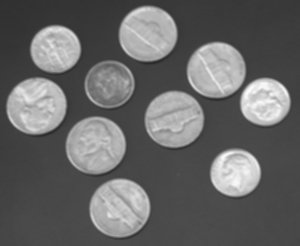

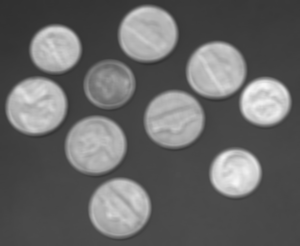

In [184]:
image_coins = cv2.imread(base_path + "/coins.png")

mean_filter_image_1 = cv2.blur(image_coins, (3, 3))

mean_filter_image_2 = cv2.blur(image_coins, (5, 5))

cv2_imshow(image_coins)
cv2_imshow(mean_filter_image_1)
cv2_imshow(mean_filter_image_2)